### Michael Owen, Assignment3


## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [3]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

In [5]:
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import SGDRegressor, SGDClassifier

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [6]:
df = pd.read_csv('gas_emissions.csv')

In [7]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


### 11 variables and 7384 rows

#### Is there any missing data?

In [9]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

### No missing data

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [10]:
df.loc[df['CO'] > 3, 'AP'].mean()

1015.6900173490633

### average value of AP for points that have CO levels above 3 = 1015.69

#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

<AxesSubplot:>

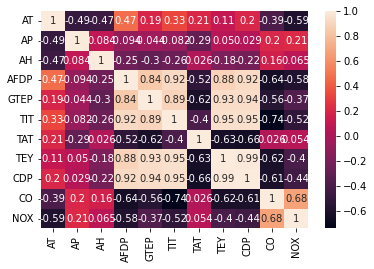

In [11]:
sns.heatmap(df.corr(), annot=True)

### Variables with high correlation (>|0.9|): TIT and AFDP. CDP and AFDP. TEY and GTEP. CDP and GTEP. TEY and TIT. CDP and TIT. TEY and CDP

#### Create a scatter plot of 'TEY' vs 'CDP'

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

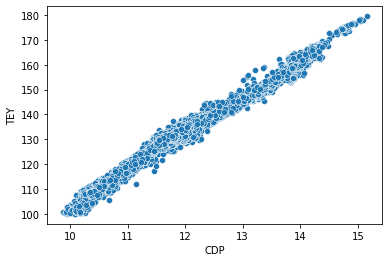

In [12]:
sns.scatterplot(data = df,x = 'CDP',y = 'TEY')

#### Create histograms for CO and NOX.

<AxesSubplot:xlabel='CO', ylabel='Count'>

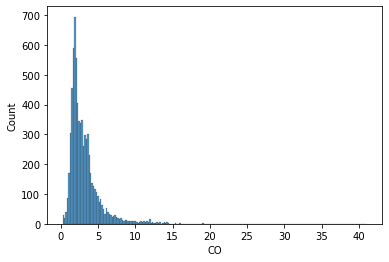

In [13]:
sns.histplot(data=df, x='CO')

<AxesSubplot:xlabel='NOX', ylabel='Count'>

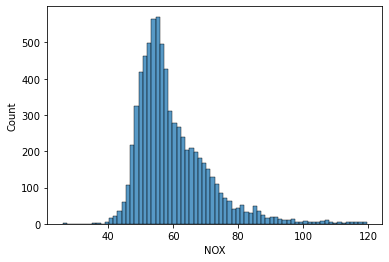

In [14]:
sns.histplot(data=df, x='NOX')

#### Create a sctter plot of CO vs NOX.

<AxesSubplot:xlabel='NOX', ylabel='CO'>

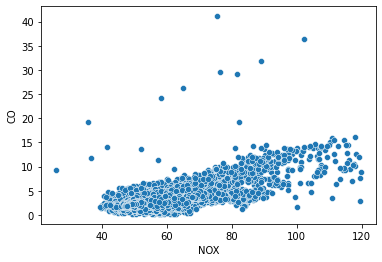

In [15]:
sns.scatterplot(x = df['NOX'], y= df['CO'])

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [16]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [18]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [19]:
X_train.shape

(5316, 9)

In [20]:
X_val.shape

(1329, 9)

In [21]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

In [22]:
import math
def train_val_r2_rmse(est):
    p_train = est.predict(X_train)
    p_val = est.predict(X_val)
    r2train = metrics.r2_score(y_train, p_train)
    r2val = metrics.r2_score(y_val, p_val)
    rmse_train = math.sqrt(metrics.mean_squared_error(y_train, p_train))
    rmse_val = math.sqrt(metrics.mean_squared_error(y_val, p_val))
    print("R2 Train: ", r2train )
    print("R2 Val: ",r2val)
    print("RMSE Train: ", rmse_train)
    print("RMSE Val: ", rmse_val)
    

In [23]:
def test_val_r2_rmse(est):
    pred = est.predict(X_test)
    p_val = est.predict(X_val)
    r2train = metrics.r2_score(y_test, pred)
    r2val = metrics.r2_score(y_val, p_val)
    rmse_test = math.sqrt(metrics.mean_squared_error(y_test, pred))
    rmse_val = math.sqrt(metrics.mean_squared_error(y_val, p_val))
    print("R2 Test: ", r2train )
    print("R2 Val: ",r2val)
    print("RMSE Test: ", rmse_test)
    print("RMSE Val: ", rmse_val)

In [24]:
def test_val_r2_rmse_std(est):
    #p_train = est.predict(X_test)
    p_val = est.predict(X_test)
    #r2train = metrics.r2_score(y_test_cat, p_train)
    #r2val = metrics.r2_score(y_val_cat, p_val)
    #rmse_train = math.sqrt(metrics.mean_squared_error(y_test_cat, p_val))
   # rmse_val = math.sqrt(metrics.mean_squared_error(y_val_cat, p_val))
    print("Accuracy Scores (Testing): ",metrics.accuracy_score(y_true = y_test_cat, y_pred = p_val))
    print("Balanced Accuracy %f"%(balanced_accuracy_score(y_test_cat, p_val)),"\n")
    print(metrics.classification_report(y_true = y_test_cat, y_pred = p_val))
    #display_confusion(p_val)

In [25]:
def train_val_r2_rmse_report(est):
    p_train = est.predict(X_train)
    p_val = est.predict(X_val)
    r2train = metrics.r2_score(y_train, p_train)
    r2val = metrics.r2_score(y_val, p_val)
    rmse_train = math.sqrt(metrics.mean_squared_error(y_train, p_train))
    rmse_val = math.sqrt(metrics.mean_squared_error(y_val, p_val))
    print("R2 Train: ", r2train )
    print("R2 Val: ",r2val)
    print("RMSE Train: ", rmse_train)
    print("RMSE Val: ", rmse_val)
    #print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val, y_pred = p_val))
    #print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val, p_val)),"\n")
    #print(metrics.classification_report(y_true = y_val, y_pred = p_val))
    #display_confusion(p_val)

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
estimator = LinearRegression()

In [28]:
estimator.fit(X_train, y_train)

LinearRegression()

In [29]:
p_train = estimator.predict(X_train)
p_val = estimator.predict(X_val)

r2train = metrics.r2_score(y_train, p_train)
r2val = metrics.r2_score(y_val, p_val)

In [30]:
print("R2 Train: ", r2train )
print("R2 Val: ",r2val)

R2 Train:  0.6640090820784397
R2 Val:  0.646343190818214


In [31]:
train_val_r2_rmse(estimator)

R2 Train:  0.6640090820784397
R2 Val:  0.646343190818214
RMSE Train:  1.2720122104103535
RMSE Val:  1.3884894690085985


- $R^2$ on training set = 0.664. $R^2$ on validation set = 0.646
- $RMSE$ on training set = 1.272. $RMSE$ on validation set = 1.388

## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [34]:
estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [35]:
train_val_r2_rmse(estimator)

R2 Train:  0.9635412068046666
R2 Val:  0.7558012206331827
RMSE Train:  0.419014117669241
RMSE Val:  1.1537808394478866


- $R^2$ on training set = 0.9635. $R^2$ on validation set = 0.7558
- $RMSE$ on training set = 0.419. $RMSE$ on validation set = 1.1537
- Here we can see that the training and validation squares are quite different (>.10 diff in $R^2$), with the training score being much higher. This is a sign of overfitting
- Performing a gridsearch to tune hypterparameters may solve this issue:

In [36]:
num_est = [25,50,125]
maxDepth = [15, 20, 30]
minSamps = [30, 50, 100]
params = {'n_estimators': num_est,
          'min_samples_split': minSamps,
         'max_depth': maxDepth, 'random_state': [RANDOM_STATE]}

rfclf = RandomForestRegressor()
grid = GridSearchCV(estimator=rfclf, param_grid=params, verbose=1, cv=5,scoring="r2", n_jobs=-1)

In [37]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [25, 50, 125], 'random_state': [0]},
             scoring='r2', verbose=1)

In [38]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=100, n_estimators=125,
                      random_state=0)

In [39]:
new_est = RandomForestRegressor(max_depth=20,min_samples_split=100, n_estimators=125, random_state=0)
new_est.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=100, n_estimators=125,
                      random_state=0)

In [40]:
train_val_r2_rmse(new_est)

R2 Train:  0.7991968923581492
R2 Val:  0.7458960609705008
RMSE Train:  0.98336042431083
RMSE Val:  1.17694800412737


- $R^2$ on training set = 0.799. $R^2$ on validation set = 0.7458
- $RMSE$ on training set = 0.983. $RMSE$ on validation set = 1.1769

## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [42]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [43]:
estimator = SVR(kernel='linear')
estimator

SVR(kernel='linear')

In [44]:
estimator.fit(X_train, y_train)

SVR(kernel='linear')

In [45]:
train_val_r2_rmse(estimator)

R2 Train:  0.6244412583337272
R2 Val:  0.6021771925365862
RMSE Train:  1.3448270895923353
RMSE Val:  1.4726394044713864


- $Linear$ Kernel SVR results:
    - $R^2$ on training set = 0.624. $R^2$ on validation set = 0.602
    - $RMSE$ on training set = 1.344. $RMSE$ on validation set = 1.47

### Polynomial Kernel SVM Regressor

In [46]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')
estimator

SVR(kernel='poly')

In [47]:
estimator.fit(X_train,y_train)

SVR(kernel='poly')

In [48]:
train_val_r2_rmse(estimator)

R2 Train:  0.7404852376508414
R2 Val:  0.7310487212257811
RMSE Train:  1.1179143857689056
RMSE Val:  1.210844531836506


- $Polynomial$ Kernel SVR results:
    - $R^2$ on training set = 0.74. $R^2$ on validation set = 0.73
    - $RMSE$ on training set = 1.11. $RMSE$ on validation set = 1.21

### RBF Kernel SVM Regressor

In [49]:
from sklearn.svm import SVR
estimator = SVR(kernel='rbf')
estimator

SVR()

In [50]:
estimator.fit(X_train,y_train)

SVR()

In [51]:
train_val_r2_rmse(estimator)

R2 Train:  0.7653225070588423
R2 Val:  0.7476173201040639
RMSE Train:  1.0630733502205554
RMSE Val:  1.1729550025939743


- $RBF$ Kernel SVR results:
    - $R^2$ on training set = 0.765. $R^2$ on validation set = 0.747
    - $RMSE$ on training set = 1.06. $RMSE$ on validation set = 1.17

### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [52]:
from sklearn.model_selection import GridSearchCV

In [55]:
estrbf= SVR(kernel='rbf')
#c = [.00001,.0001,.001,.01,.1,1,10,50]
#g = [.00001,.0001,.001,.01,.1,1]
params = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(estimator=estrbf, param_grid=params, verbose=1, cv=5, scoring="r2",n_jobs=-1)

In [56]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='r2', verbose=1)

In [57]:
grid.best_estimator_

SVR(C=1000, gamma=0.01)

In [58]:
new_est = SVR(kernel='rbf', C=1000, gamma=0.01)
new_est.fit(X_train, y_train)

SVR(C=1000, gamma=0.01)

In [59]:
train_val_r2_rmse(new_est)

R2 Train:  0.7922405098710453
R2 Val:  0.7568500533368835
RMSE Train:  1.0002485869507587
RMSE Val:  1.151300431382969


- $RBF$ Kernel SVR results after $gridsearch$ and hypterparameter tuning:
    - $R^2$ on training set = 0.7922. $R^2$ on validation set = 0.756
    - $RMSE$ on training set = 1.0. $RMSE$ on validation set = 1.15

## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models: 
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain. 


In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792 0.98704348 0.9959942
 0.99975821 0.99992456 1.        ]


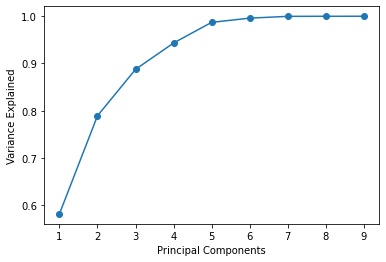

In [62]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

In [63]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

In [64]:
def train_val_r2_rmse_pca(est):
    p_train = est.predict(X_train_pca2)
    p_val = est.predict(X_val_pca2)
    r2train = metrics.r2_score(y_train, p_train)
    r2val = metrics.r2_score(y_val, p_val)
    rmse_train = math.sqrt(metrics.mean_squared_error(y_train, p_train))
    rmse_val = math.sqrt(metrics.mean_squared_error(y_val, p_val))
    print("After PCA...")
    print("R2 Train: ", r2train )
    print("R2 Val: ",r2val)
    print("RMSE Train: ", rmse_train)
    print("RMSE Val: ", rmse_val)

**Linear Regression with PCA transformed data**

In [65]:
lr_est = LinearRegression()

lr_est.fit(X_train_pca2, y_train)

LinearRegression()

In [66]:
train_val_r2_rmse_pca(lr_est)

After PCA...
R2 Train:  0.6557906042002006
R2 Val:  0.6333206399655549
RMSE Train:  1.2874751982855395
RMSE Val:  1.413822244602062


- LinearRegresion Results $BEFORE$ $PCA$:
    - $R^2$ on training set = 0.664. $R^2$ on validation set = 0.646
    - $RMSE$ on training set = 1.272. $RMSE$ on validation set = 1.388
- LinearRegresion Results $AFTER$ $PCA$
    - $R^2$ on training set = 0.6557. $R^2$ on validation set = 0.633
    - $RMSE$ on training set = 1.287. $RMSE$ on validation set = 1.41
- Overall, it seems that not much has changed between the two in terms of performance/accuracy

**RF Regression with PCA transformed data**

In [71]:
rf_est = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rf_est.fit(X_train_pca2, y_train)

RandomForestRegressor(random_state=0)

In [72]:
train_val_r2_rmse_pca(rf_est)

After PCA...
R2 Train:  0.9630548121704725
R2 Val:  0.7372337558608612
RMSE Train:  0.4217998787395343
RMSE Val:  1.1968407422860916


- RandomForestRegressor Results $BEFORE$ $PCA$ (non-gridsearch params):
    - $R^2$ on training set = 0.9635. $R^2$ on validation set = 0.7558
    - $RMSE$ on training set = 0.419. $RMSE$ on validation set = 1.1537
- RandomForestRegressor Results $AFTER$ $PCA$ (non-gridsearch params):
    - $R^2$ on training set = 0.963. $R^2$ on validation set = 0.737
    - $RMSE$ on training set = 0.421. $RMSE$ on validation set = 1.196
- Overall, there don't appear to be any signifcant differences or improvements after PCA

**SVM Regression with PCA transformed data**

In [73]:
svr_estimator = SVR(kernel='linear')
svr_estimator.fit(X_train_pca2, y_train)

SVR(kernel='linear')

In [74]:
train_val_r2_rmse_pca(svr_estimator)

After PCA...
R2 Train:  0.6188480067071092
R2 Val:  0.5934919174706614
RMSE Train:  1.354804432288416
RMSE Val:  1.4886279557320838


- $Linear$ Kernel SVR results $before$ $PCA$:
    - $R^2$ on training set = 0.624. $R^2$ on validation set = 0.602
    - $RMSE$ on training set = 1.344. $RMSE$ on validation set = 1.47
- $Linear$ Kernel SVR results $after$ $PCA$:
    - $R^2$ on training set = 0.618. $R^2$ on validation set = 0.593
    - $RMSE$ on training set = 1.354. $RMSE$ on validation set = 1.488
- Overall, there don't appear to be any signifcant differences or improvements after PCA

## Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [75]:
from sklearn.preprocessing import Binarizer

In [76]:
binarizer = Binarizer(threshold=3)

In [77]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [78]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

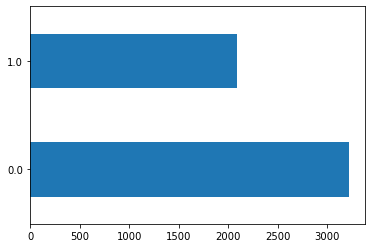

In [79]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [80]:
from sklearn.svm import SVC

In [81]:
estimator = SVC(kernel ='rbf')
estimator

SVC()

#### SVC Model 1 

In [82]:
def display_confusion(p_val):
    confusion_matrix =  pd.crosstab(index=np.ravel(y_val_cat), columns=p_val.ravel(), rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()

In [83]:
def train_val_r2_rmse_std(est):
    p_train = est.predict(X_train)
    p_val = est.predict(X_val)
    r2train = metrics.r2_score(y_train_cat, p_train)
    r2val = metrics.r2_score(y_val_cat, p_val)
    rmse_train = math.sqrt(metrics.mean_squared_error(y_train_cat, p_train))
    rmse_val = math.sqrt(metrics.mean_squared_error(y_val_cat, p_val))
    print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = p_val))
    print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val_cat, p_val)),"\n")
    print(metrics.classification_report(y_true = y_val_cat, y_pred = p_val))
    display_confusion(p_val)
    #print("After Standardization...")
    #print("R2 Train: ", r2train )
    #print("R2 Val: ",r2val)
    #print("RMSE Train: ", rmse_train)
    #print("RMSE Val: ", rmse_val)

In [84]:
def train_val_r2_rmse_pca2(est):
    p_train = est.predict(X_train_pca2)
    p_val = est.predict(X_val_pca2)
    r2train = metrics.r2_score(y_train_cat, p_train)
    r2val = metrics.r2_score(y_val_cat, p_val)
    rmse_train = math.sqrt(metrics.mean_squared_error(y_train_cat, p_train))
    rmse_val = math.sqrt(metrics.mean_squared_error(y_val_cat, p_val))
    print("Accuracy Scores (Validation): ",metrics.accuracy_score(y_true = y_val_cat, y_pred = p_val))
    print("Balanced Accuracy %f"%(balanced_accuracy_score(y_val_cat, p_val)),"\n")
    print(metrics.classification_report(y_true = y_val_cat, y_pred = p_val))
    display_confusion(p_val)

In [85]:
c = [.00001,.0001,.001,.01,.1,1,10,50]
g = [.00001,.0001,.001,.01,.1,1]
params = {'C': c, 'gamma': g}
grid = GridSearchCV(estimator, params, cv=5, n_jobs=-1)
grid.fit(X_train, y_train_cat)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]})

In [86]:
grid.best_estimator_

SVC(C=1, gamma=1)

Accuracy Scores (Validation):  0.9112114371708051
Balanced Accuracy 0.903448 

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.87      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329



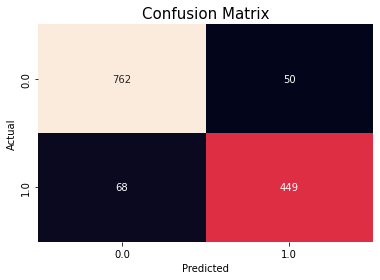

In [87]:
est_gs = SVC(kernel='rbf', C=1, gamma=1)
est_gs.fit(X_train,y_train_cat)
train_val_r2_rmse_std(est_gs)

#### SVC Model 2

In [88]:
c = [.00001,.0001,.001,.01,.1,1,10,50]
g = [.00001,.0001,.001,.01,.1,1]
params = {'C': c, 'gamma': g}
grid = GridSearchCV(estimator, params, cv=5, n_jobs=-1)
grid.fit(X_train_pca2, y_train_cat)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]})

In [89]:
grid.best_estimator_

SVC(C=1, gamma=1)

Accuracy Scores (Validation):  0.9112114371708051
Balanced Accuracy 0.902745 

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       812
         1.0       0.90      0.86      0.88       517

    accuracy                           0.91      1329
   macro avg       0.91      0.90      0.91      1329
weighted avg       0.91      0.91      0.91      1329



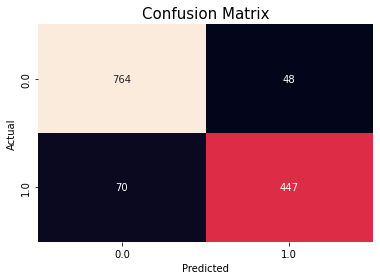

In [90]:
est_gs = SVC(kernel='rbf', C=1, gamma=1)
est_gs.fit(X_train_pca2,y_train_cat)
train_val_r2_rmse_pca2(est_gs)

- Similar performance between standarized and pca transformed data. Both performed quite well on validation set

## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

### Lets first try Lasso regression, followed by Ridge

In [91]:
# YOUR CODE
from sklearn.linear_model import Lasso
estimator = Lasso(random_state=RANDOM_STATE)
estimator.fit(X_train_pca2, y_train)


Lasso(random_state=0)

In [92]:
train_val_r2_rmse_pca(estimator)

After PCA...
R2 Train:  0.35839700098246985
R2 Val:  0.3382300934657997
RMSE Train:  1.7577645590868747
RMSE Val:  1.8993503673719447


In [93]:
from sklearn.linear_model import Ridge
ridge_est = Ridge(alpha=1.0)
ridge_est.fit(X_train_pca2, y_train)

Ridge()

In [94]:
train_val_r2_rmse_pca(ridge_est)

After PCA...
R2 Train:  0.6557905772968637
R2 Val:  0.6333175671889992
RMSE Train:  1.2874752485999394
RMSE Val:  1.4138281685116396


- Results: Ridge performed decent without obvious signs of overfitting, while Lasso performed much more poorly
- Could further investigate ridge performance by tuning hyperparameters

## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

#### Let's try GaussianNB. Then we will perform hypterparameter tuning to see if performance improves

In [95]:
# YOUR CODE
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train_cat)

GaussianNB()

Accuracy Scores (Validation):  0.8194130925507901
Balanced Accuracy 0.827973 

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84       812
         1.0       0.72      0.87      0.79       517

    accuracy                           0.82      1329
   macro avg       0.81      0.83      0.82      1329
weighted avg       0.83      0.82      0.82      1329



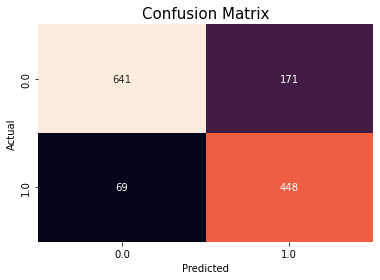

In [96]:
train_val_r2_rmse_std(gnb)

In [98]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}
gnbclf = GaussianNB()
gs_NB = GridSearchCV(estimator=gnbclf, param_grid=params, verbose=1, scoring='accuracy', n_jobs=-1) 
gs_NB.fit(X_train, y_train_cat)
gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.8111308307896871}

Accuracy Scores (Validation):  0.8284424379232506
Balanced Accuracy 0.833957 

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85       812
         1.0       0.74      0.86      0.80       517

    accuracy                           0.83      1329
   macro avg       0.82      0.83      0.82      1329
weighted avg       0.84      0.83      0.83      1329



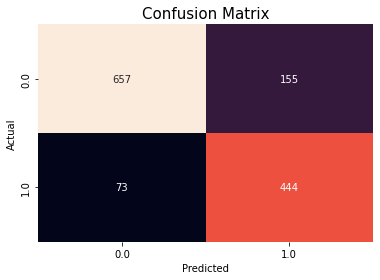

In [100]:
new_gsnb = GaussianNB(var_smoothing=0.8111308307896871)
new_gsnb.fit(X_train,y_train_cat)
train_val_r2_rmse_std(new_gsnb)

- Accuracy on validation improved slightly after tuning, along with balanced accuracy

## Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



In [202]:
# YOUR CODE
best_regressor1 = RandomForestRegressor(max_depth=20,min_samples_split=100, n_estimators=125, random_state=0)
best_regressor1.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=100, n_estimators=125,
                      random_state=0)

In [203]:
test_val_r2_rmse(best_regressor1)

R2 Test:  0.5889574493718721
R2 Val:  0.7458960609705008
RMSE Test:  1.4962669947016956
RMSE Val:  1.17694800412737


In [204]:
best_regressor2 = SVR(kernel='rbf')
best_regressor2.fit(X_train,y_train)

SVR()

In [205]:
test_val_r2_rmse(best_regressor2)

R2 Test:  0.5933703930098788
R2 Val:  0.7476173201040639
RMSE Test:  1.4882133759945957
RMSE Val:  1.1729550025939743


In [206]:
df = pd.DataFrame({ "R2 (Test)": [.588,.593], "RMSE (test)": [1.496, 1.488] }, index=["RFR", "SVR-rbf"])
df.T

,RFR,SVR-rbf
R2 (Test),0.588,0.593
RMSE (test),1.496,1.488


#### Performance on test set was lower than expected. Overfitting could've led to this.
- Overall it seems that SVR-rbf performs best for regression

- What did you learn in this project? Any suggestions?

In [208]:
# Your comments
best_classifier1 = SVC(kernel='rbf', C=1, gamma=1)
best_classifier1.fit(X_train,y_train_cat)
test_val_r2_rmse_std(best_classifier1)

Accuracy Scores (Testing):  0.9174560216508796
Balanced Accuracy 0.909360 

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       467
         1.0       0.90      0.88      0.89       272

    accuracy                           0.92       739
   macro avg       0.91      0.91      0.91       739
weighted avg       0.92      0.92      0.92       739



In [209]:
from sklearn.naive_bayes import GaussianNB
best_classifier2 = GaussianNB()
best_classifier2.fit(X_train, y_train_cat)
print("Classification Metrics for Test set: ")
test_val_r2_rmse_std(best_classifier2)

Classification Metrics for Test set: 
Accuracy Scores (Testing):  0.857916102841678
Balanced Accuracy 0.864553 

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       467
         1.0       0.76      0.89      0.82       272

    accuracy                           0.86       739
   macro avg       0.85      0.86      0.85       739
weighted avg       0.87      0.86      0.86       739



In [207]:
df = pd.DataFrame({ "Accuracy": [.857,.917], "Balanced Accuracy": [.8645,.909], "F1": [.86,.92]}, index=["GNB", "SVC-rbf"])
df.T

,GNB,SVC-rbf
Accuracy,0.8570,0.917
Balanced Accuracy,0.8645,0.909
F1,0.8600,0.920


### Seems like the classifiers performed better on test set than the regressors

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_